In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Изучаем данные файла**

### Читаем файл, ознакамливаемся с фичами

In [ ]:
df = pd.read_csv('churn.csv')
df.head(20)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


### Кол-во столбцов и строк

In [132]:
print(f'columns: {df.shape[1]}, rows: {df.shape[0]}')

columns: 20, rows: 10127


### Смотрим тип фичей и кол-во в них ненулевых значений

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Проблем с нулями и неправильными типами данных относительно значений нет

In [ ]:
# ещё один способ проверить нащи фичи на Null значения
df.isnull().sum()

,0
churn,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


### Смотрим максимальное и минимальное значение каждой фичи, а также их значение по четвертям и отклонение

In [ ]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Визуально сильно выделяющихся значений в столбцах нет  

### Смотрим уникальные и самые повторяющиеся категориальные значения



In [22]:
df.describe(include='O')

,churn,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,3,6,4
top,Existing Customer,F,Graduate,Single,Less than $40K,Blue
freq,8500,5358,3128,4691,3561,9436


### Проверяем наличие дубликатов

In [69]:
df.duplicated().sum()

0

In [ ]:
# # Проверяем наличие дубликатов и удаляем, если они есть
# if df.duplicated().sum():
#   print(df.duplicated().sum())
#   df.drop_duplicates(inplace=True)
# df.duplicated().sum()

0

<Axes: >

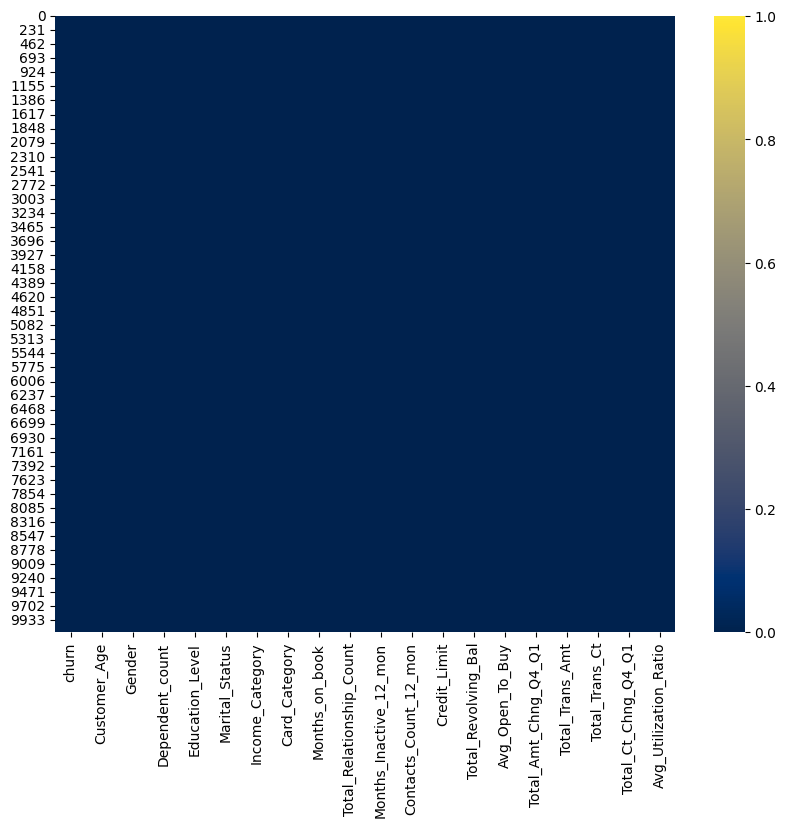

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isnull(), cmap='cividis', vmin=0, vmax=1)

Дубликатов нет

# **Проверяем столбцы на выбросы**

### Находим из столбцов те, которые представляют числовые признаки
### Выделяем из них с выбросами

In [14]:
df_setect_out = df[df.columns[df.dtypes != 'object']]

outlier_cols = []

for column in df_setect_out.columns:
    Q1 = df_setect_out[column].quantile(0.25)
    Q3 = df_setect_out[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_setect_out[column] < Q1 - 1.5 * IQR) | (df_setect_out[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


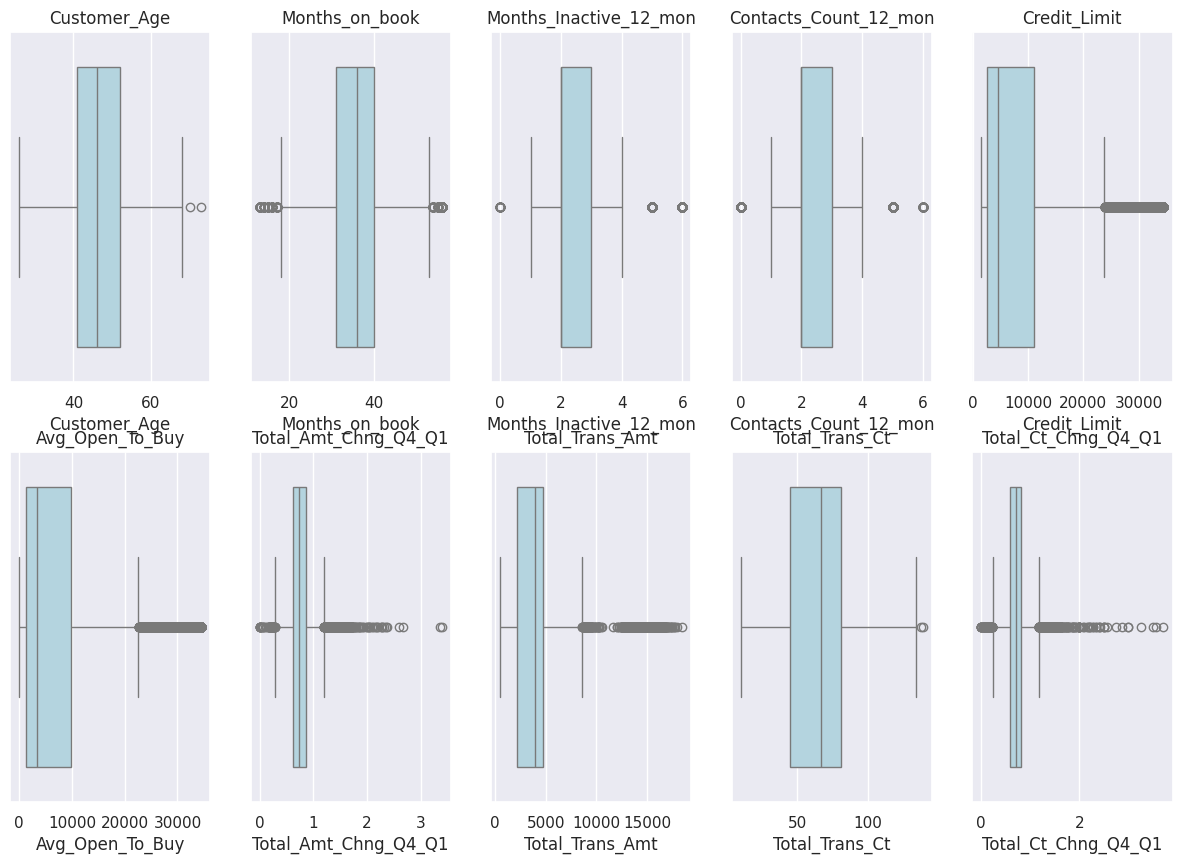

In [15]:
# визуализируем выбросы
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 10))
for i, column in enumerate(df[outlier_cols].columns):
    sns.boxplot(x=df_setect_out[column], ax=axes[i // 5][i - (i // 5) * 5], color='lightblue')
    axes[i // 5][i - (i // 5) * 5].set_title(column)

На графиках четко видны выбросы, однако с точки зрения величины значений выбросов относительно информации колонок соответствующих графикам, можно сделать вывод, что все значения не являются аномалиями. В подтверждение этому можно посмотреть описание - df.describe()

In [8]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Макимальные и минимальные значения естественные, никаких 200-летних дедов и т.п нет

In [45]:
# dd = df_setect_out.copy()

# for col in df_setect_out.columns:
#   # Mean of the distribution
#   Mean = df_setect_out[col].mean()

#   # satndard deviation of the distribution
#   sd  = df_setect_out[col].std()

#   lower_limit = Mean - 3*sd
#   upper_limit = Mean + 3*sd

#   dd[col]=df_setect_out[col][(df_setect_out[col]>lower_limit)&(df_setect_out[col]<upper_limit)]
# dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10126 non-null  float64
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10003 non-null  float64
 5   Contacts_Count_12_mon     10073 non-null  float64
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      9964 non-null   float64
 10  Total_Trans_Amt           9736 non-null   float64
 11  Total_Trans_Ct            10125 non-null  float64
 12  Total_Ct_Chng_Q4_Q1       10014 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: flo

# **Визуализация и корреляция**

### Посмторим общее кол-во и соотношение состояний клиента  

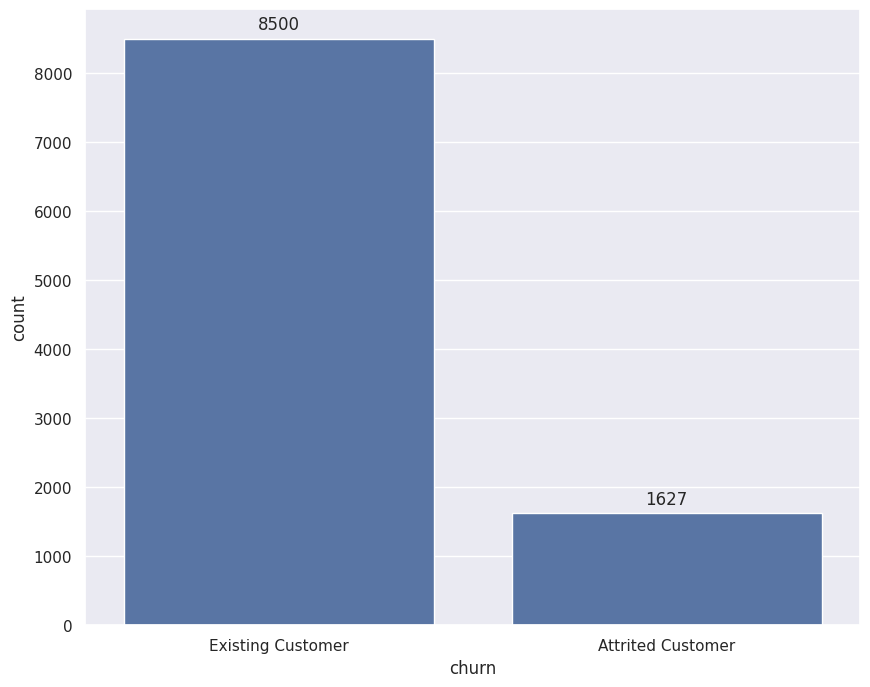

In [16]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(data=df, x=df['churn'])
for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

### Создадим таблицу для категориальных значений

In [42]:
dfs = pd.DataFrame(df[df.columns[df.dtypes == 'object']])
dfs

,churn,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


### Посмторим, какие числовые столбцы больше влияют на состояние клиента (ушел/остался)

In [43]:
# посмтрим корр столбцов к ушедшим/существующим клиентам
dfс = pd.DataFrame(df.groupby('churn')[[i for i in df[df.columns[df.dtypes != 'object']].columns]].mean())
dfс

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
churn,,,,,,,,,,,,,,
Attrited Customer,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
Existing Customer,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412


### Построим графики корреляции для каждой фичи с состоянием клиента

Поменяем object значение на int для счета корр.

In [44]:
df['churn'] = df['churn'].replace({'Attrited Customer': 0, 'Existing Customer': 1})


<ipython-input-44-69431d207e99>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['churn'] = df['churn'].replace({'Attrited Customer': 0, 'Existing Customer': 1})


Каждый график показывает среднее значение каждой фичи по отношению к состоянию клиента

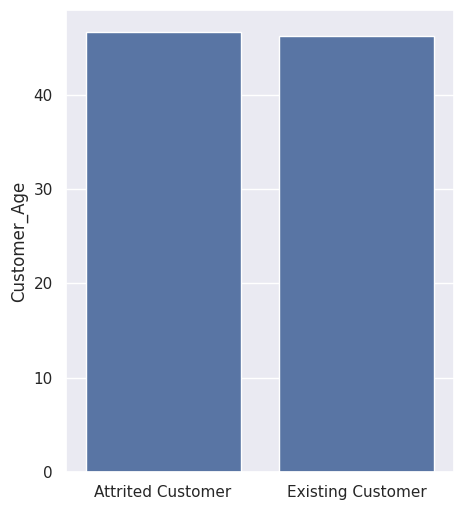

       Customer_Age
churn              
0         46.659496
1         46.262118
Корреляция: -0.018203138532550688


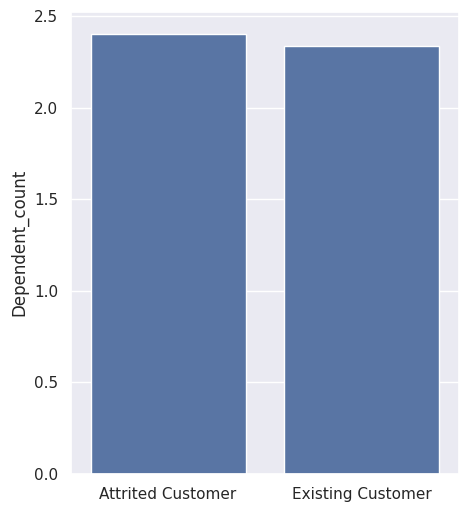

       Dependent_count
churn                 
0             2.402581
1             2.335412
Корреляция: -0.018990596311193746


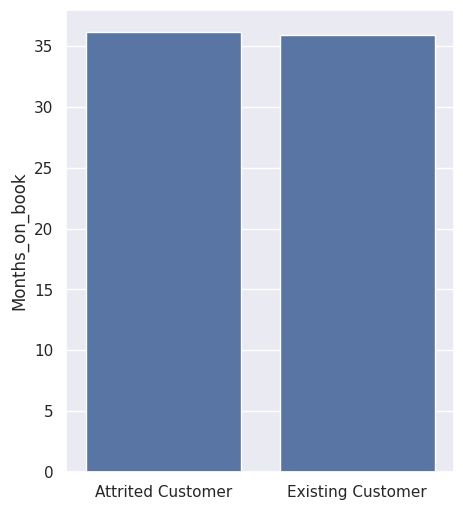

       Months_on_book
churn                
0           36.178242
1           35.880588
Корреляция: -0.013686851177909758


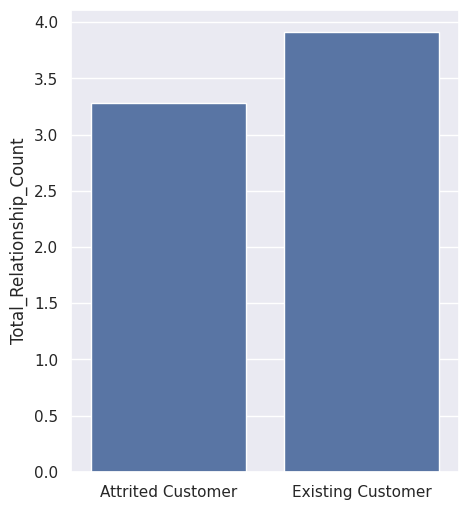

       Total_Relationship_Count
churn                          
0                      3.279656
1                      3.914588
Корреляция: 0.15000522801913743


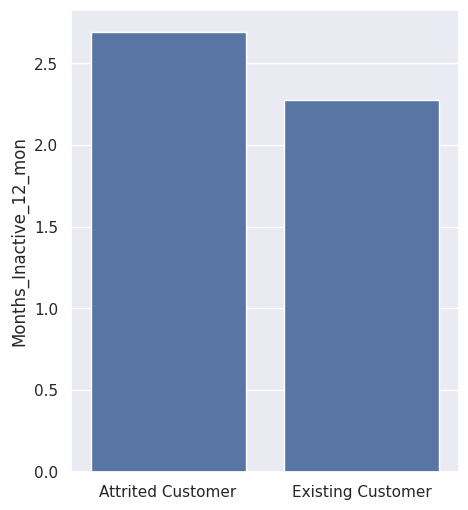

       Months_Inactive_12_mon
churn                        
0                    2.693301
1                    2.273765
Корреляция: -0.15244880632692467


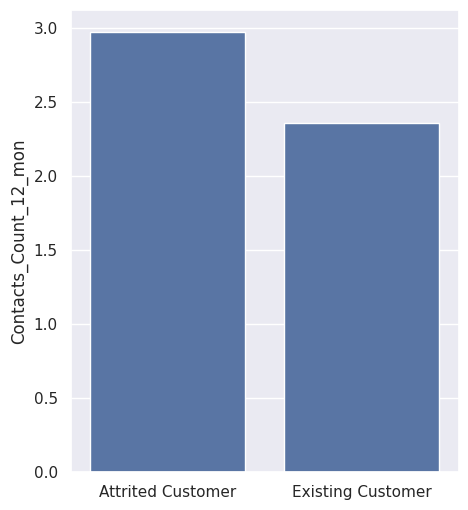

       Contacts_Count_12_mon
churn                       
0                   2.972342
1                   2.356353
Корреляция: -0.20449050998160426


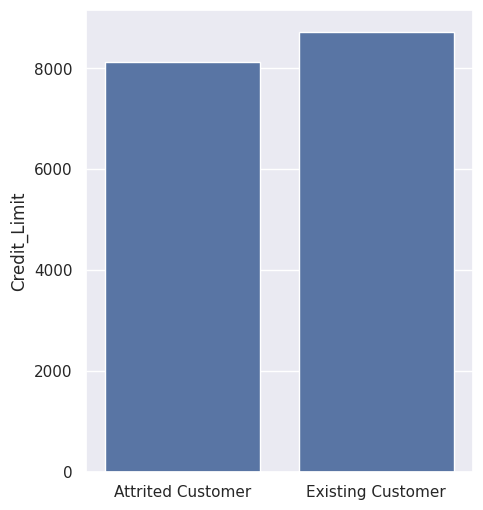

       Credit_Limit
churn              
0       8136.039459
1       8726.877518
Корреляция: 0.023872994836161506


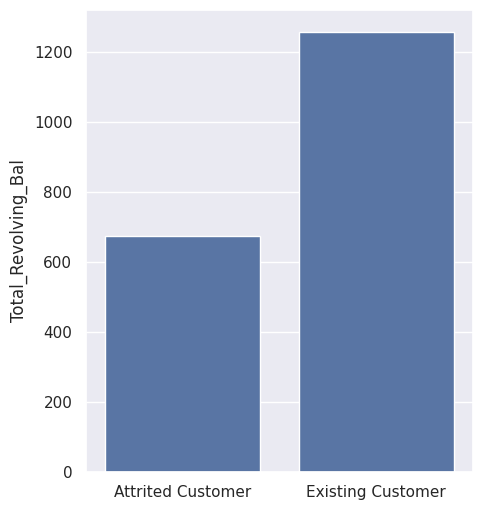

       Total_Revolving_Bal
churn                     
0               672.822987
1              1256.604118
Корреляция: 0.2630528831292031


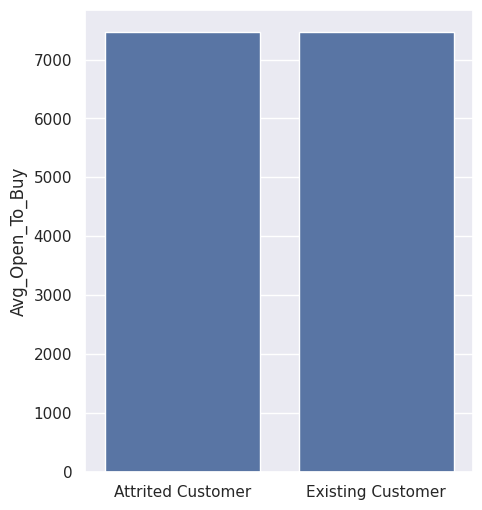

       Avg_Open_To_Buy
churn                 
0          7463.216472
1          7470.273400
Корреляция: 0.000285077493937809


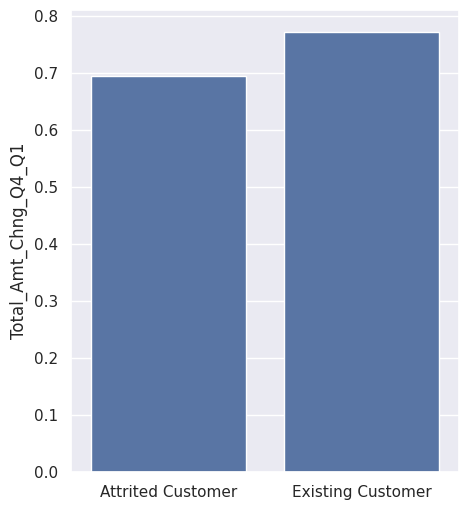

       Total_Amt_Chng_Q4_Q1
churn                      
0                  0.694277
1                  0.772510
Корреляция: 0.13106284781447


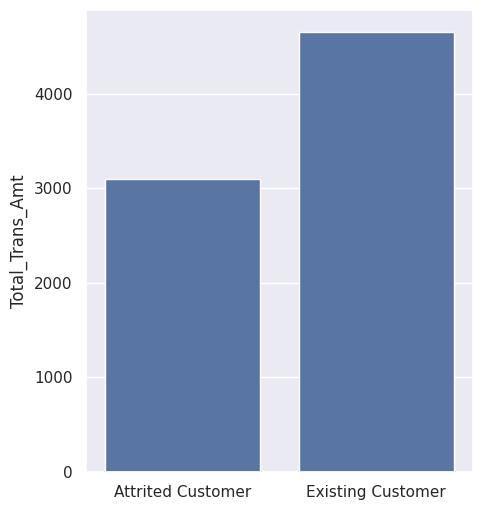

       Total_Trans_Amt
churn                 
0          3095.025814
1          4654.655882
Корреляция: 0.16859838141007882


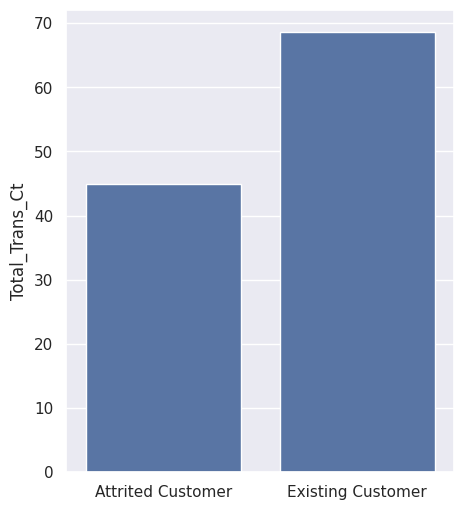

       Total_Trans_Ct
churn                
0           44.933620
1           68.672588
Корреляция: 0.3714027011889274


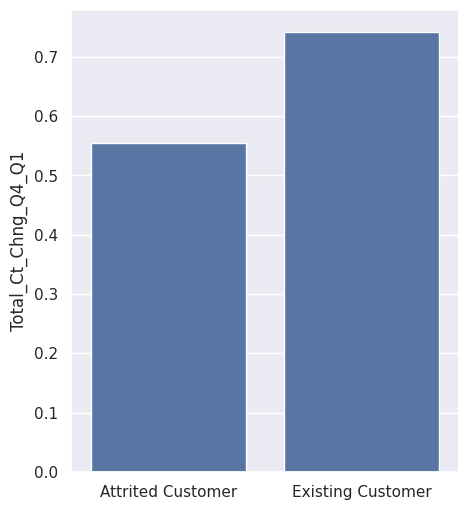

       Total_Ct_Chng_Q4_Q1
churn                     
0                 0.554386
1                 0.742434
Корреляция: 0.29005400688089095


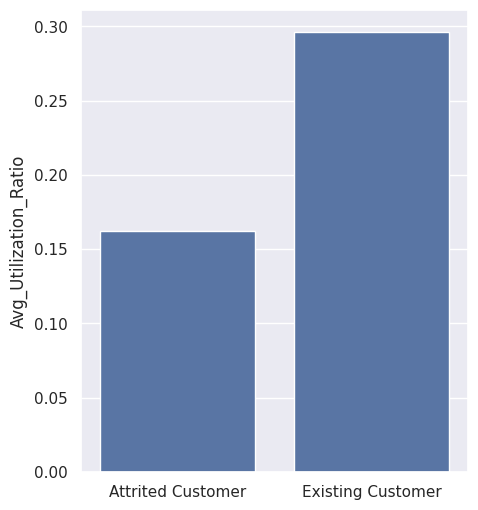

       Avg_Utilization_Ratio
churn                       
0                   0.162475
1                   0.296412
Корреляция: 0.17841033156174663


In [31]:
for col in dfс.columns:
  sns.set(style="darkgrid")
  plt.figure(figsize=(5, 6))
  sns.barplot(x=dfс.index, y=dfс[col], data=dfс)
  plt.xlabel('')
  plt.ylabel(df[col].name)
  plt.show()
  cor = pd.DataFrame(df.groupby('churn')[df[col].name].mean())
  print(cor)
  correlation = df['churn'].corr(df[col])
  print(f'Корреляция: {correlation}')

Из всех колонок, которые влияют на решение клиента уйти или остаться, можно выделить следующие:
*   Total_Relationship_Count
*   Months_Inactive_12_mon
*   Contacts_Count_12_mon
*   Credit_Limit
*   Total_Revolving_Bal
*   Total_Amt_Chng_Q4_Q1
*   Total_Trans_Amt
*   Total_Trans_Ct
*   Total_Ct_Chng_Q4_Q1
*   Avg_Utilization_Ratio



Соответственно мы можеим удалить колонки, которые не несут за собой информации, которая поможет нам определить состояние клиента

## Посмотрим то же по категориальным данным

Чтобы это сделать, надо провести кодировку значений, так как необходимо иметь значения int

### **Кодируем данные для корр всего датафрейма**

In [21]:
df.head(21)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,1,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,1,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,1,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,1,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Используем OrdinalEncoder для кодировки категориальных значений

In [45]:
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df.head(21)

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,1,51,1,4,6,1,0,1,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,1,32,1,0,3,3,2,3,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,1,37,1,3,5,2,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,1,48,1,2,2,2,3,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
df.head(22)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  int64  
 1   Income_Category           10127 non-null  int64  
 2   Total_Relationship_Count  10127 non-null  int64  
 3   Months_Inactive_12_mon    10127 non-null  int64  
 4   Contacts_Count_12_mon     10127 non-null  int64  
 5   Credit_Limit              10127 non-null  float64
 6   Total_Revolving_Bal       10127 non-null  int64  
 7   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 8   Total_Trans_Amt           10127 non-null  int64  
 9   Total_Trans_Ct            10127 non-null  int64  
 10  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 11  Avg_Utilization_Ratio     10127 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 949.5 KB


### Составляем графики и корр. для категориальных данных

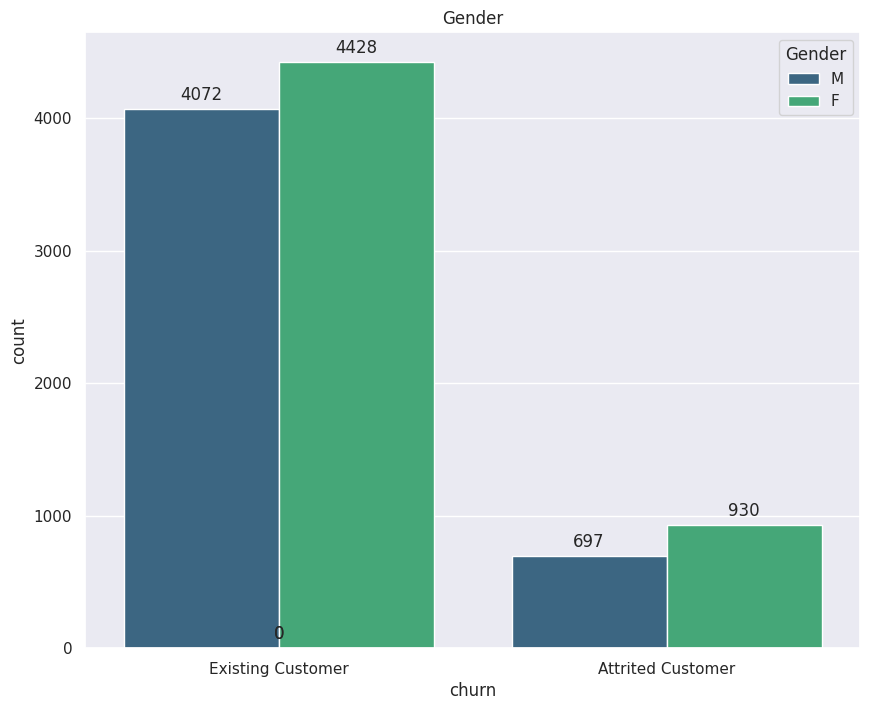

         Gender
churn          
0      0.428396
1      0.479059
Корреляция: 0.03727169573136129


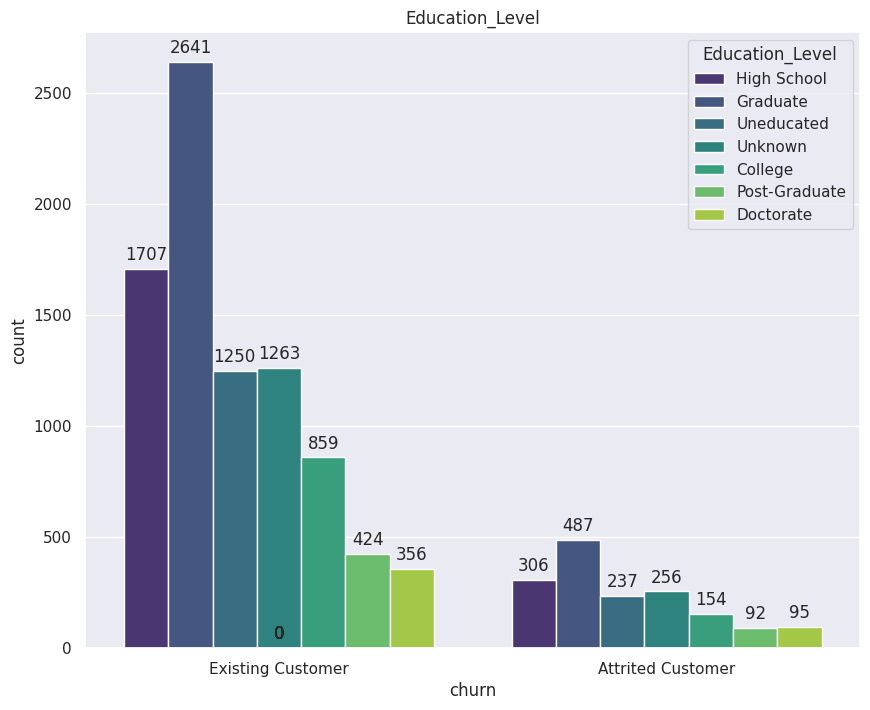

       Education_Level
churn                 
0             3.119852
1             3.092118
Корреляция: -0.005551085188376553


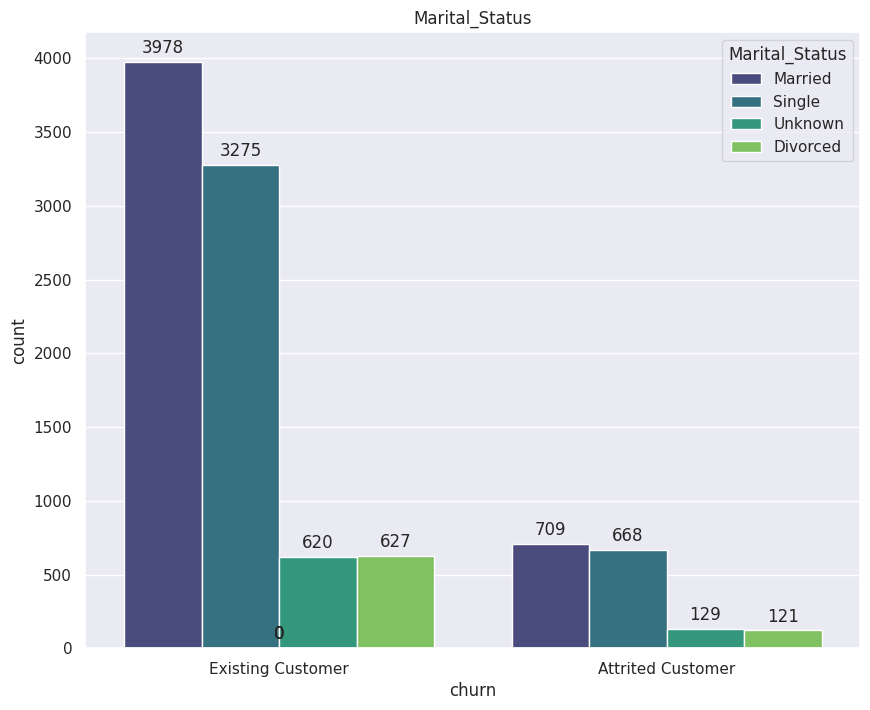

       Marital_Status
churn                
0            1.494776
1            1.457412
Корреляция: -0.01859741994577636


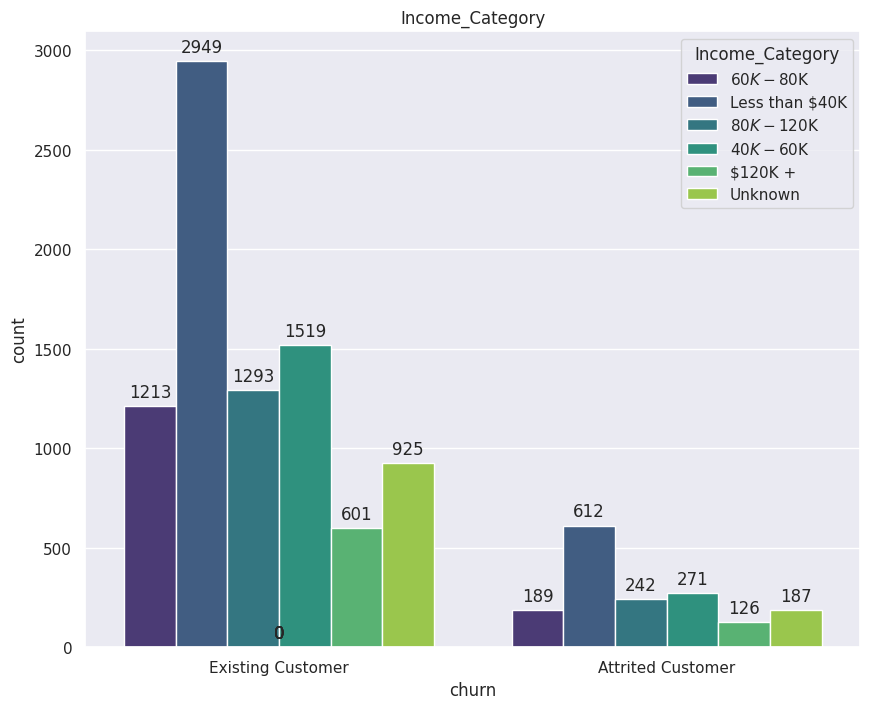

       Income_Category
churn                 
0             2.924401
1             2.852353
Корреляция: -0.017583880499138393


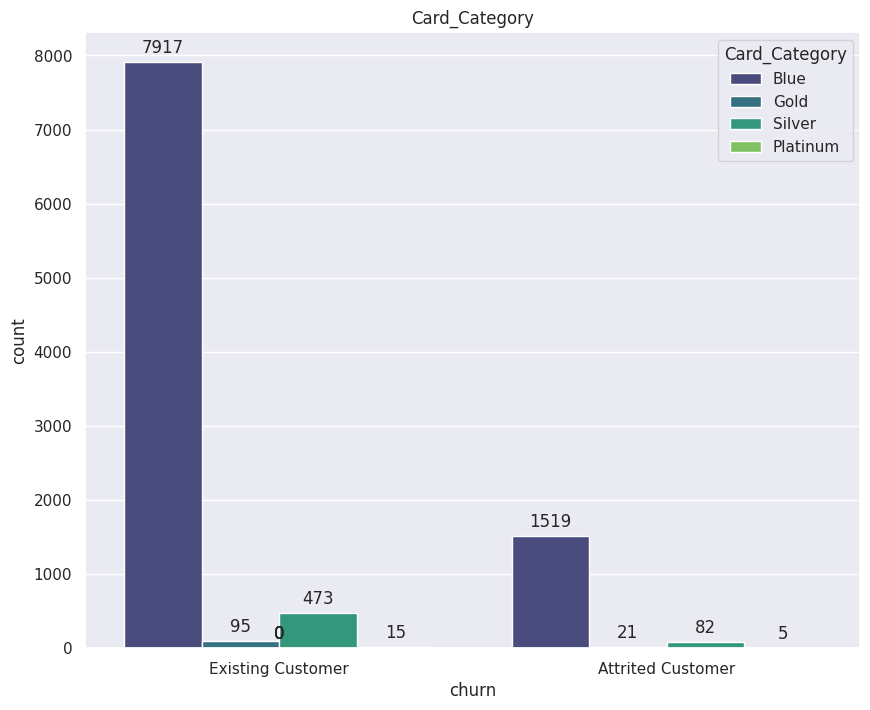

       Card_Category
churn               
0           0.170252
1           0.181647
Корреляция: 0.0060381320691226675


In [46]:
for col in range(1, len(dfs.columns)):
  plt.figure(figsize=(10, 8))
  plot = sns.countplot(x=dfs['churn'], hue=dfs[dfs.columns[col]],  palette='viridis')
  for p in plot.patches:
      plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  plt.title(dfs.columns[col])
  plt.show()
  cor = pd.DataFrame(df.groupby('churn')[dfs.columns[col]].mean())
  print(cor)
  correlation = df['churn'].corr(df[dfs.columns[col]])
  print(f'Корреляция: {correlation}')



Визуально соотношение графиков схоже, разница в измерении объясняется естественной разницей количества существующих клиентов и ушедших. Кое-где все таки есть маленькая погрешность в соотношении столбцов графика, но, опять же, это можно объяснить маленьким кол-вом ушедших клиентов по сравнению к существующим. Вероятно, если было бы больше данных, то все сошлось бы. Корр. незначительная => можно удалить столбцы

### Избавляемся от колонок с бесполезными значимостями

In [47]:
useless = ['Avg_Open_To_Buy', 'Income_Category', 'Months_on_book', 'Dependent_count', 'Customer_Age', 'Marital_Status', 'Education_Level', 'Dependent_count', 'Gender', 'Customer_Age', 'Card_Category']
df.drop(useless, axis=1,inplace=True)
df

,churn,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,1,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,1,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,1,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,1,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...
10122,1,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10123,0,4,2,3,4277.0,2186,0.804,8764,69,0.683,0.511
10124,0,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000
10125,0,4,3,3,5281.0,0,0.535,8395,62,0.722,0.000


# **Таблица корреляции**

<Axes: >

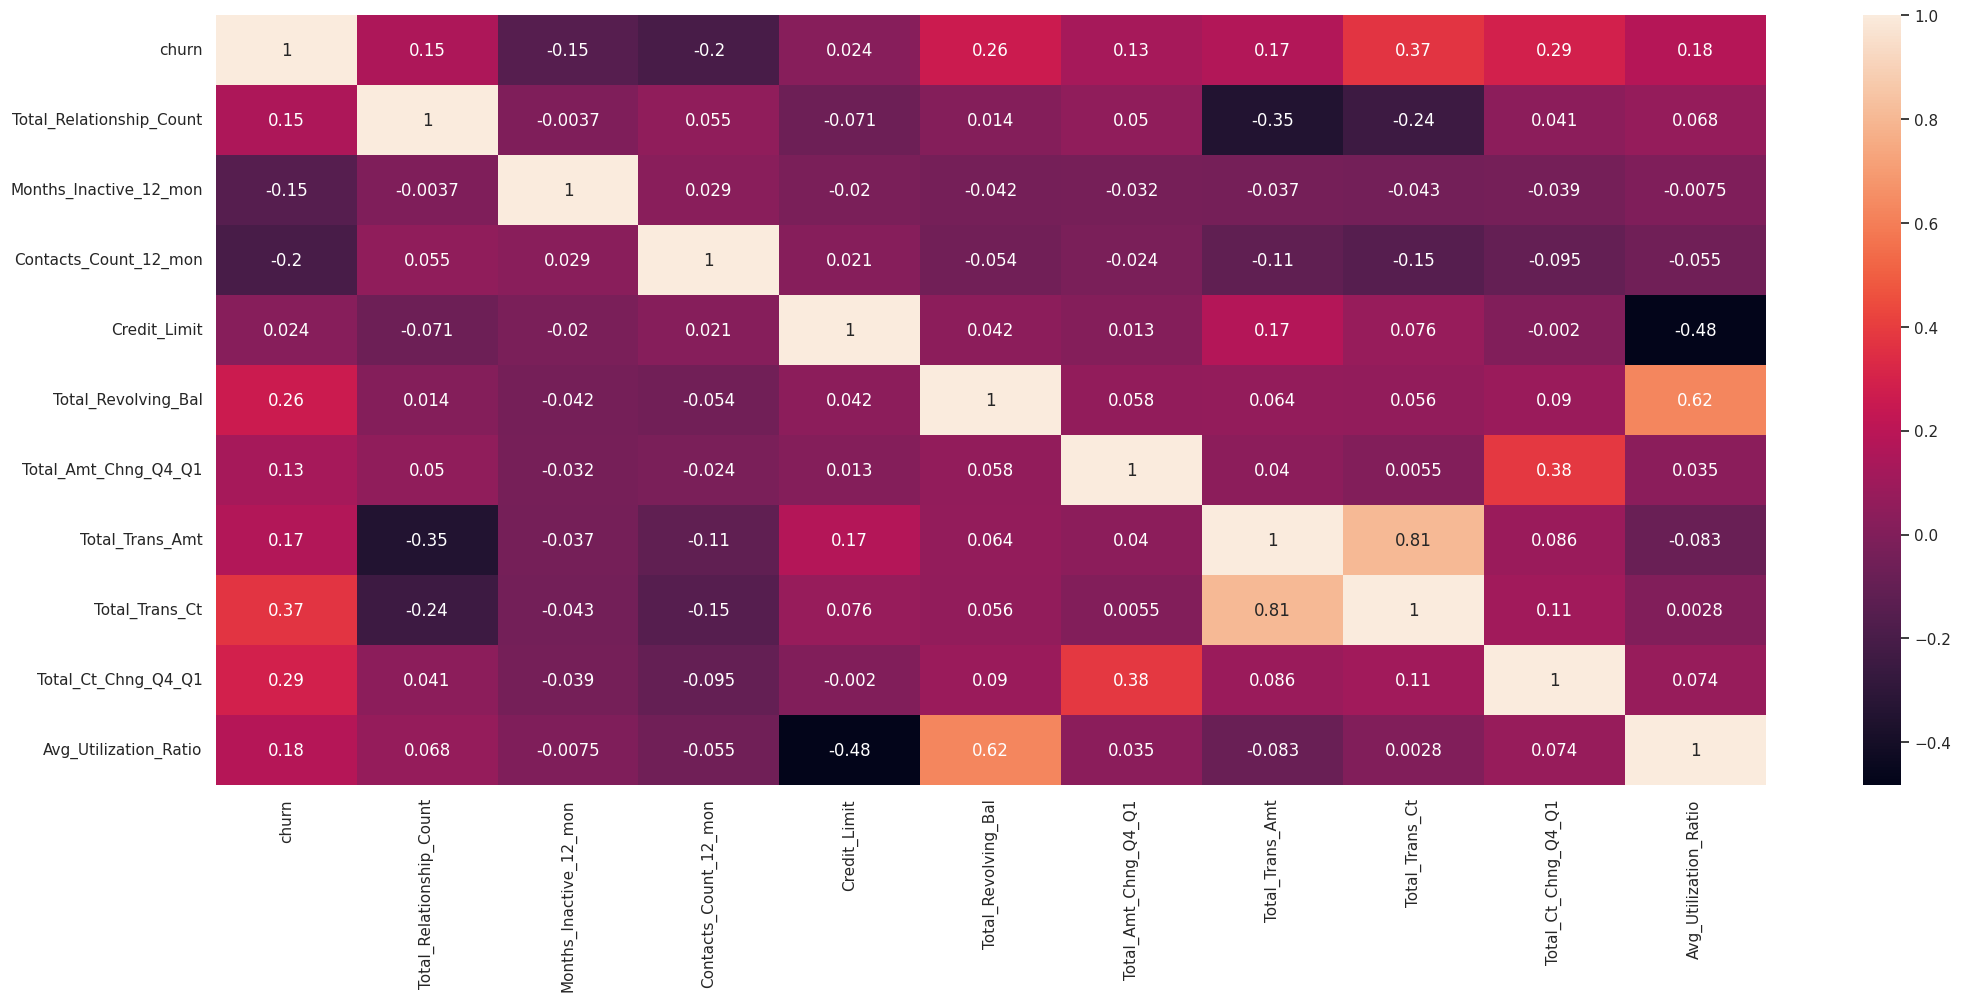

In [48]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot=True)

По данной таблице ясно, что на отток клиентов больше коррелирует число контактов и кол-во неактивных месяцев, значит по этим данным с болшей вероятностью можно определить ушедшего клиента
А также видно, что чем больше кол-во операций, общая сумма сделки, изменение количества транзакций, общий оборотный остаток на кредитной карте, кол-во продуктов тем больше вероятность, что клиет остался

# **Обучение моделей**

Начинаем наши train и test

### Деление на train и test

In [49]:
X = df.drop(columns='churn')
y = df['churn']

X - то, на чем мы учим, y - то, что мы определяем

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Запускаем наши модели и смотрим метрики

### DecisionTreeClassifier

<Axes: >

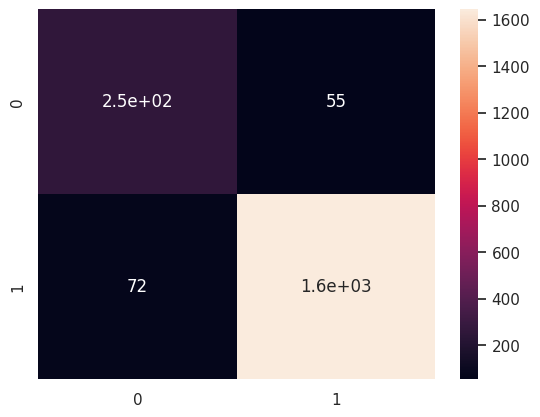

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [305]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       351
           1       0.96      0.96      0.96      1675

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026



### RandomForestClassifier

<Axes: >

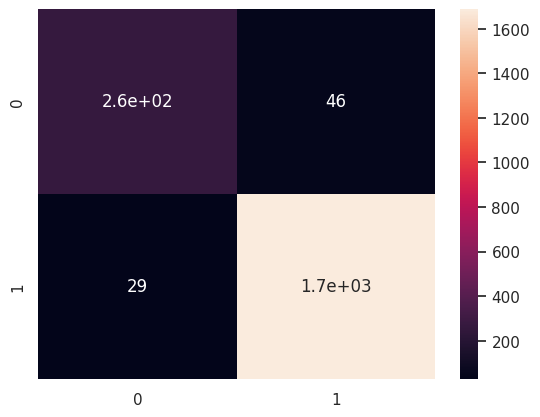

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_true = y_test
y_pred = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [53]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88       309
           1       0.97      0.98      0.98      1717

    accuracy                           0.96      2026
   macro avg       0.94      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026



### AdaBoostClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Axes: >

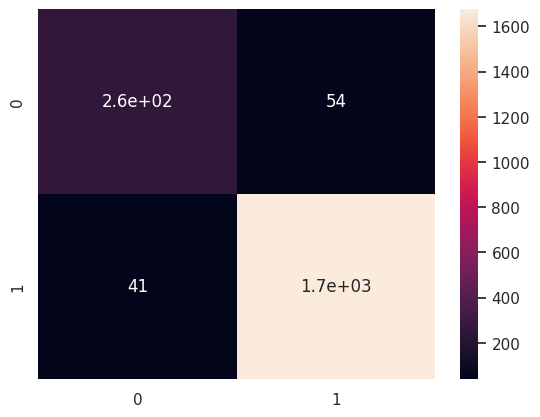

In [58]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)

In [59]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       309
           1       0.97      0.98      0.97      1717

    accuracy                           0.95      2026
   macro avg       0.92      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026



### HistGradientBoostingClassifier

<Axes: >

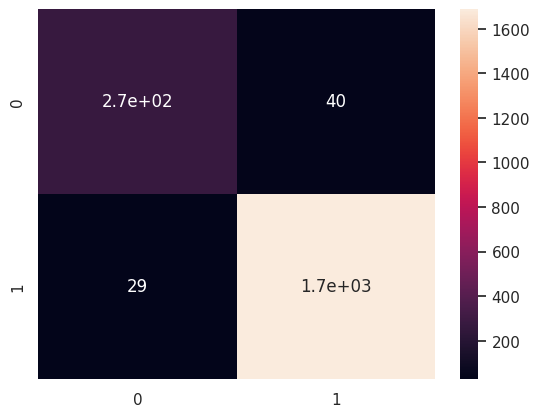

In [65]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       309
           1       0.98      0.98      0.98      1717

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.97      0.97      0.97      2026



### BaggingClassifier

<Axes: >

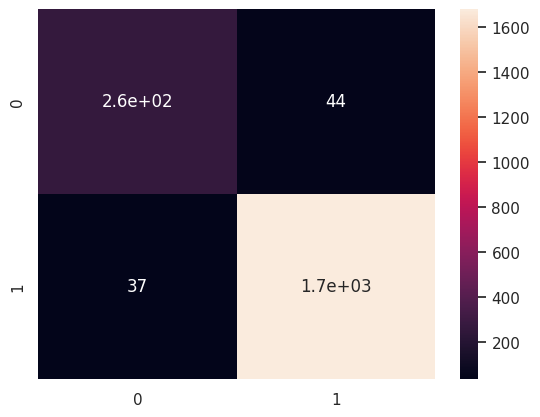

In [66]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)

In [67]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       309
           1       0.97      0.98      0.98      1717

    accuracy                           0.96      2026
   macro avg       0.93      0.92      0.92      2026
weighted avg       0.96      0.96      0.96      2026



### Итог по классификаторам

По итогу изучения мертриков,где большее внимание мы уделяем для precision (характеризует долю правильно предсказанных положительных классов среди всех образцов, которые модель спрогнозировала как положительный класс), recall (отражает долю правильно предсказанных положительных ответов среди всех реальных положительных образцов) и f1_score, видно, что модель HistGradientBoostingClassifier лидирует среди всех при работе с табличными, неоднородными данными, в которых нет линейных зависимостей